# Random Forests

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=1)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [5]:
rf.feature_importances_

array([0.05958855, 0.01315869, 0.03209834, 0.07325123, 0.00359689,
       0.01471979, 0.05362886, 0.08196504, 0.00442049, 0.00465715,
       0.00671823, 0.00317893, 0.01763635, 0.02806233, 0.00362721,
       0.00434324, 0.01218108, 0.00806194, 0.00372994, 0.00411391,
       0.12964814, 0.01259946, 0.112041  , 0.08871077, 0.01224458,
       0.01625372, 0.03657524, 0.13781781, 0.01242649, 0.00894461])

In [7]:
import pandas as pd

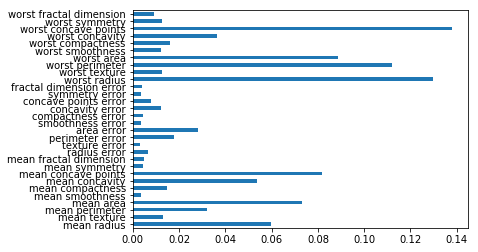

In [8]:
pd.Series(rf.feature_importances_,
          index=cancer.feature_names).plot(kind="barh")

# Exercise
Use a random forest classifier or random forest regressor on a dataset of your choice.
Try different values of n_estimators and max_depth and see how they impact performance and runtime.
Tune ``max_features`` with GridSearchCV.

In [15]:
data=pd.read_csv('data/adult.csv',index_col=0)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
income = data.income
data_features = data.drop("income", axis=1)
display(data_features.head())

### one hot encode data
data_one_hot = pd.get_dummies(data_features)
data_one_hot.head()

### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [17]:
### Cross-validation with default parameters
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X_train_scaled, y_train, cv=5)
print(scores.mean())

0.8398031996941338


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': range(2, 30)}
grid = GridSearchCV(RandomForestClassifier(random_state=0), 
                    param_grid=param_grid,
                    cv=5,
                   return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(2, 30)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

Text(0.5, 0, 'param_n_estimators')

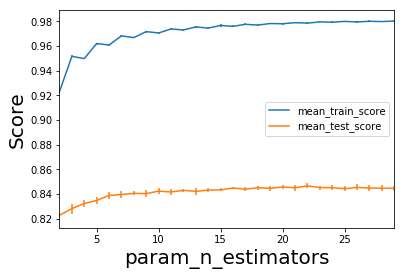

In [28]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_n_estimators', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_n_estimators', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.ylabel('Score',fontsize=20)
plt.xlabel('param_n_estimators',fontsize=20)

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(2, 20)}
grid = GridSearchCV(RandomForestClassifier(random_state=0), 
                    param_grid=param_grid,
                    cv=5,
                   return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

Text(0.5, 0, 'param_max_depth')

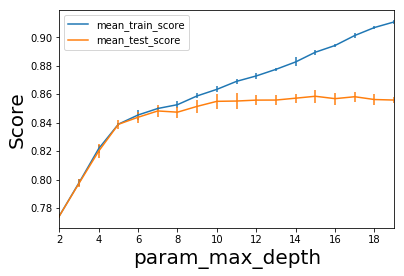

In [32]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.ylabel('Score',fontsize=20)
plt.xlabel('param_max_depth',fontsize=20)

In [38]:
param_grid = {'max_depth': range(15, 20),
              'n_estimators': range(10, 15)
             }
grid = GridSearchCV(RandomForestClassifier(random_state=0), 
                    param_grid=param_grid,
                    cv=5,
                   return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(15, 20), 'n_estimators': range(10, 15)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [39]:
grid.best_params_

{'max_depth': 17, 'n_estimators': 13}

In [42]:
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [45]:
y_pred=grid.predict(X_test_scaled)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred)

0.7583834909716252